### Scientific Notebook of Aye Aye Project Update 15.09.2024

This notebook is an update to the Previous Version including (Neural Network and Mixture of Experts) which outlines the data preprocessing steps performed on two differnet Data sets Benefit_Knowledge_Data: 
<br>it's 1- Binary <br>
2- IDvis.Indri & and IDvis.Microcebus are aggregated to "Other.lemurs" (binary variable) which shows 285 instances of 1 and 107x0. <br>
3- knowledge diet was dropped <br>
and Benefit_sociodemographic_data.
. To utilize this module, ensure the installation of the following packages: NumPy, Pandas, scikit-learn, XGBoost, Seaborn, and SHAP **(using either Conda or pip package managers)**.

**Procedure:**

1. **Preprocessing** 
2. **Training Models (Xgb, RF, LR)** 
3. **Mixture of Experts with Neural Network** 


## DATA: Benefit Knowledge

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import spearmanr
import shap
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance



In [2]:
### 0. Importing data ###
dataBK = pd.read_csv(r'C:\Users\yazda\Desktop\AyeAye2024\Aye-Aye-Project\data\Benefit_Knowledge_data.csv', delimiter=';')
dataBK.head(10)

,Clove.benefit.score,ID.nom,ID.vis.Aye,Other.lemurs,Diet.Insects,Knowledge.signs,Knowledge.Abundance,Activity.knowledge,Weight.knowledge,Lifestyle.knowledge,Lemur.knowledge,Aye.aye.protected,encountered.binary
0,1,0,0,1,1,0,1,1,0,0,1,1,0
1,1,1,1,1,1,1,1,1,0,1,1,1,0
2,1,0,0,1,0,0,1,1,0,0,1,1,0
3,1,1,1,1,1,0,1,1,1,1,1,1,1
4,0,1,1,1,0,0,1,1,0,1,0,1,0
5,0,0,0,1,1,0,0,1,0,0,1,1,0
6,1,1,0,1,1,0,1,1,0,1,0,1,0
7,1,0,0,1,0,0,1,1,0,1,0,1,0
8,0,0,0,0,1,0,1,1,0,0,1,1,0
9,0,0,0,0,0,0,1,1,0,1,1,0,0


In [3]:
dataSD = pd.read_csv(r'C:\Users\yazda\Desktop\AyeAye2024\Aye-Aye-Project\data\Benefit_sociodemographic_data.csv', delimiter=';')
df = pd.DataFrame(dataSD)
# df_int = df.select_dtypes(include='int64')  # Select integer columns

In [4]:
target = dataBK['Clove.benefit.score']


In [5]:
dataBK.head()

,Clove.benefit.score,ID.nom,ID.vis.Aye,Other.lemurs,Diet.Insects,Knowledge.signs,Knowledge.Abundance,Activity.knowledge,Weight.knowledge,Lifestyle.knowledge,Lemur.knowledge,Aye.aye.protected,encountered.binary
0,1,0,0,1,1,0,1,1,0,0,1,1,0
1,1,1,1,1,1,1,1,1,0,1,1,1,0
2,1,0,0,1,0,0,1,1,0,0,1,1,0
3,1,1,1,1,1,0,1,1,1,1,1,1,1
4,0,1,1,1,0,0,1,1,0,1,0,1,0


### Jaccard Correlation Score on all features using weighted average

                 Column  Jaccard_Score
0                ID.nom       0.350691
1            ID.vis.Aye       0.452403
2          Other.lemurs       0.414112
3          Diet.Insects       0.538827
4       Knowledge.signs       0.398559
5   Knowledge.Abundance       0.417170
6    Activity.knowledge       0.463580
7      Weight.knowledge       0.424636
8   Lifestyle.knowledge       0.409083
9       Lemur.knowledge       0.423635
10    Aye.aye.protected       0.396862
11   encountered.binary       0.417736


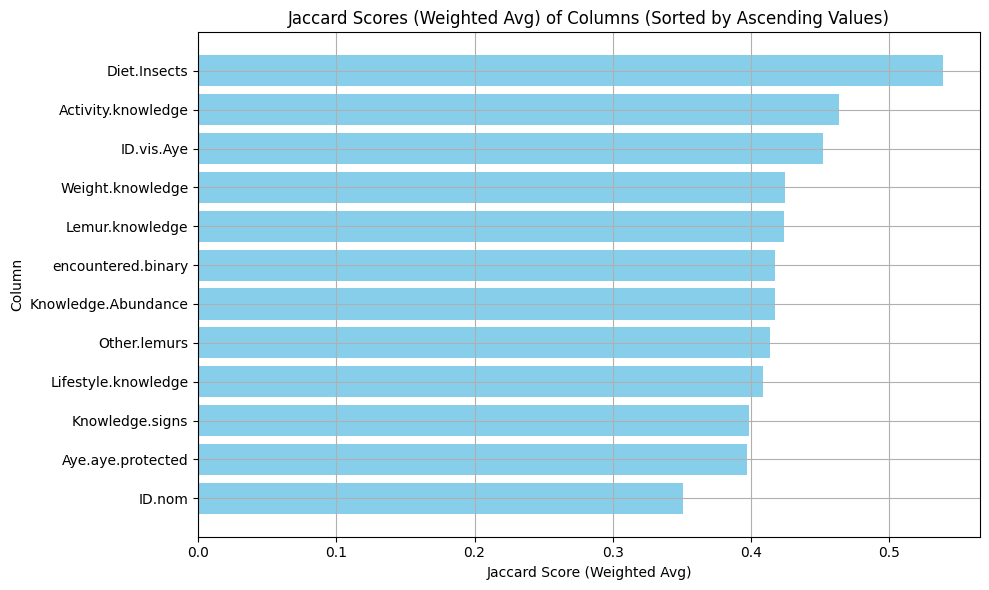

In [6]:
jaccard_scores = {}
for col in dataBK.columns:
    if col != 'Clove.benefit.score':  # Skip the target column
        try:
            unique_values = dataBK[col].nunique()
            score = jaccard_score(target, dataBK[col], average='weighted')
            jaccard_scores[col] = score
            
        except ValueError as e:
            print(f"Could not calculate Jaccard score for column {col}: {e}")
            jaccard_scores[col] = None
jaccard_df = pd.DataFrame(list(jaccard_scores.items()), columns=['Column', 'Jaccard_Score'])
print(jaccard_df)
jaccard_df = jaccard_df.sort_values(by='Jaccard_Score', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(jaccard_df['Column'], jaccard_df['Jaccard_Score'], color='skyblue')
plt.xlabel('Jaccard Score (Weighted Avg)')
plt.ylabel('Column')
plt.title('Jaccard Scores (Weighted Avg) of Columns (Sorted by Ascending Values)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Jaccard Correlation Score on all features using micro average

                 Column  Jaccard_Score
0                ID.nom       0.368237
1            ID.vis.Aye       0.476460
2          Other.lemurs       0.430657
3          Diet.Insects       0.540275
4       Knowledge.signs       0.417722
5   Knowledge.Abundance       0.415162
6    Activity.knowledge       0.465421
7      Weight.knowledge       0.435897
8   Lifestyle.knowledge       0.407540
9       Lemur.knowledge       0.422868
10    Aye.aye.protected       0.415162
11   encountered.binary       0.441176


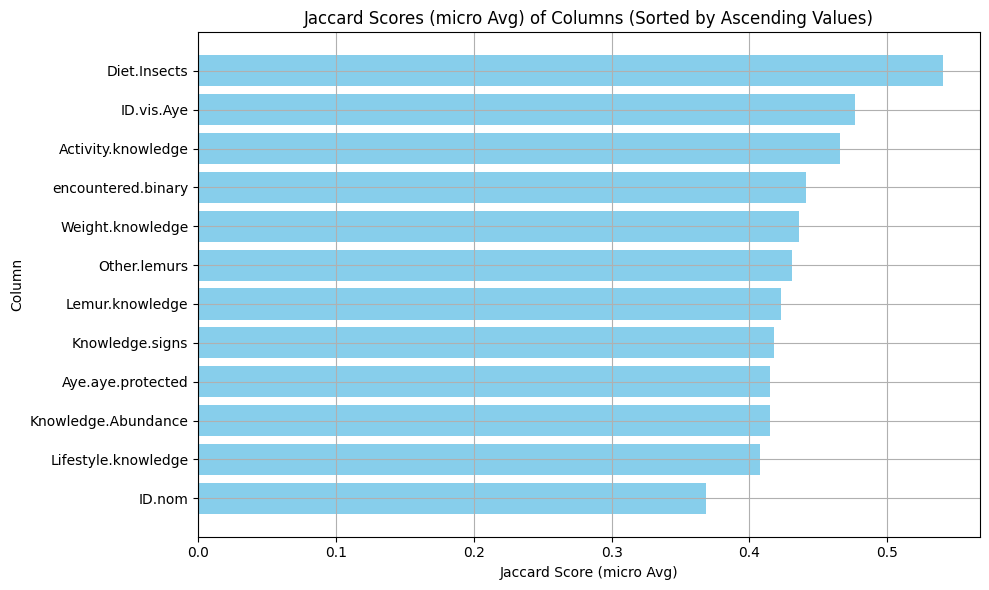

In [7]:
for col in dataBK.columns:
    if col != 'Clove.benefit.score':  # Skip the target column
        try:
            unique_values = dataBK[col].nunique()
            score = jaccard_score(target, dataBK[col], average='micro')
            jaccard_scores[col] = score
            
        except ValueError as e:
            print(f"Could not calculate Jaccard score for column {col}: {e}")
            jaccard_scores[col] = None
jaccard_df = pd.DataFrame(list(jaccard_scores.items()), columns=['Column', 'Jaccard_Score'])
print(jaccard_df)
jaccard_df = jaccard_df.sort_values(by='Jaccard_Score', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(jaccard_df['Column'], jaccard_df['Jaccard_Score'], color='skyblue')
plt.xlabel('Jaccard Score (micro Avg)')
plt.ylabel('Column')
plt.title('Jaccard Scores (micro Avg) of Columns (Sorted by Ascending Values)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Spearman Correlation with Target Column:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



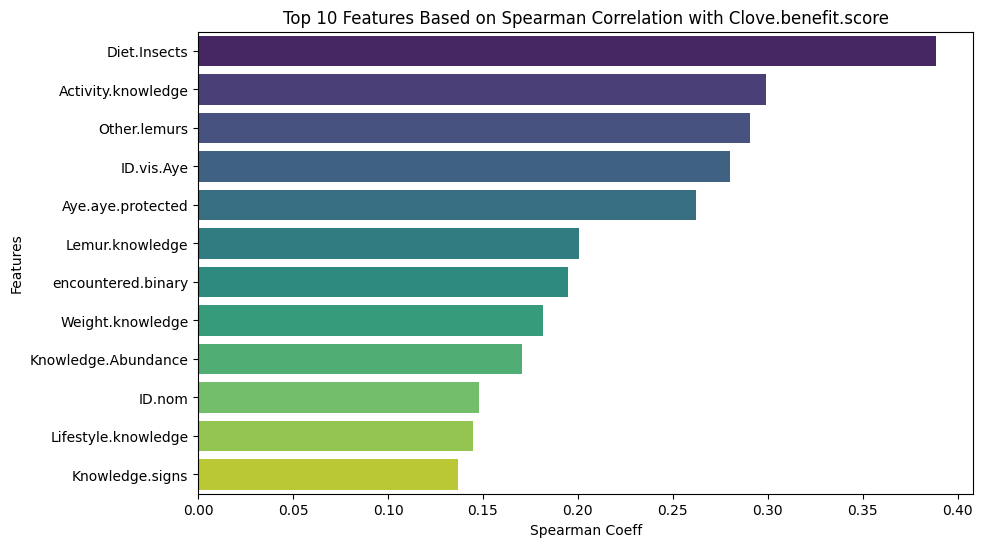

In [8]:
# Step 1: Calculate Spearman correlation with the target
dataBK1 = dataBK.drop(columns=['Clove.benefit.score'])
spearman_corr = dataBK1.apply(lambda x: spearmanr(x, target)[0])

# Step 2: Select top features based on Spearman correlation
top_features = spearman_corr.abs().sort_values(ascending=False).index[:30]  # Top 30 features
top_spearman_corr = spearman_corr[top_features]

# Step 3: Plot the Spearman correlation values for the top features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_spearman_corr.values, y=top_spearman_corr.index, palette="viridis")
plt.title('Top 10 Features Based on Spearman Correlation with Clove.benefit.score')
plt.xlabel('Spearman Coeff')
plt.ylabel('Features')
plt.show()

In [9]:
top_spearman_corr

Diet.Insects           0.388766
Activity.knowledge     0.299081
Other.lemurs           0.290874
ID.vis.Aye             0.280184
Aye.aye.protected      0.262131
Lemur.knowledge        0.200404
encountered.binary     0.194617
Weight.knowledge       0.181684
Knowledge.Abundance    0.170565
ID.nom                 0.147828
Lifestyle.knowledge    0.144869
Knowledge.signs        0.136833
dtype: float64

### Training Logistic Regression and Feature Importance based on LR 

Logistic Regression Feature Importance:
Other.lemurs           0.525319
Diet.Insects           0.455804
Aye.aye.protected      0.336026
Activity.knowledge     0.331145
Weight.knowledge       0.186079
ID.vis.Aye             0.150181
Knowledge.signs        0.121222
Lifestyle.knowledge    0.072264
ID.nom                 0.004610
Lemur.knowledge       -0.040376
Knowledge.Abundance   -0.041938
encountered.binary    -0.071931
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



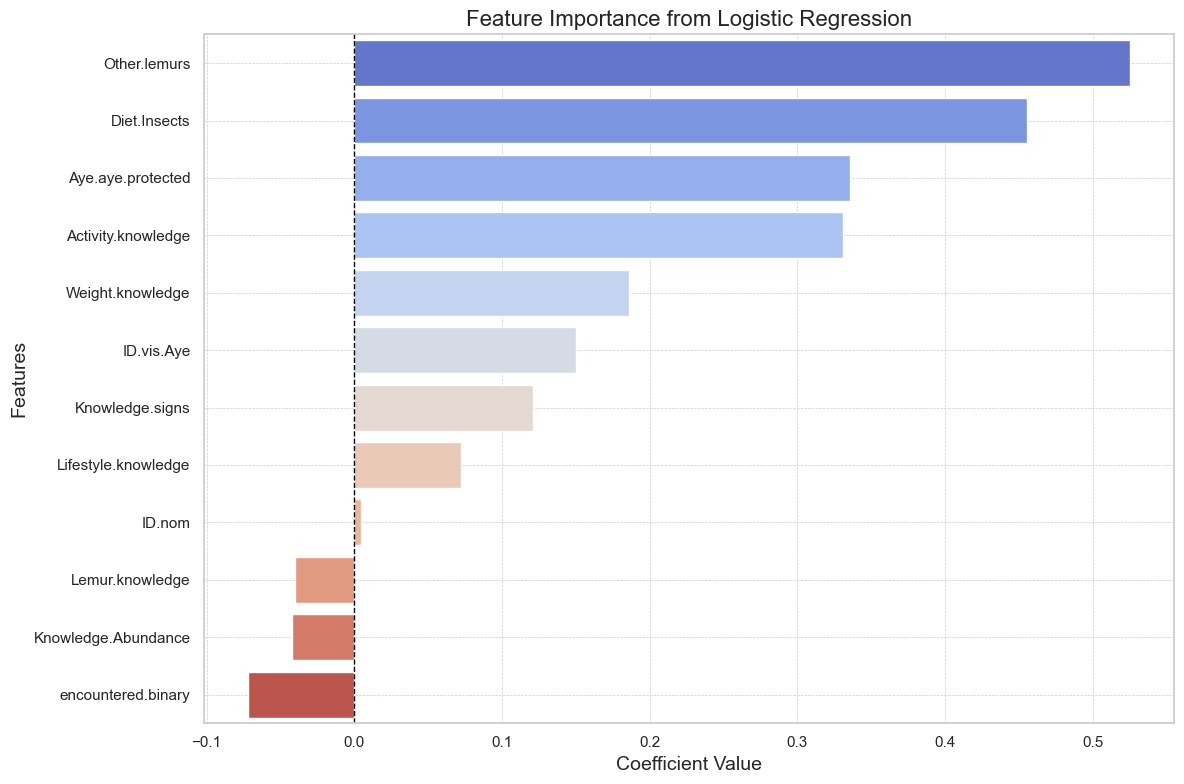

In [10]:
# sf = [
#     'Knowledge.non.benefit.score.max.6', 'Diet.Insects', 'Gender_Male', 'Gender_Female',
#     'ID.vis.Aye', 'ID.vis.Microcebus', 'Aye.aye.protected', 'ID.vis.Indri',
#     'encountered.binary', 'Extracts.Medical.plants', 'ID.nom', 'Farms.Cloves',
#     'Region_A', 'Region_B', 'Region_C', 'Region_X',
#     'Age_31-40', 'Age_41-50', 'Age_51-60',
#     'edu.level_1', 'edu.level_2', 'edu.level_3',
#     'edu.level_4'
# ]

# Separate the selected features and target variable
X = dataBK1
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=123)
# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
modelLr = LogisticRegression()
modelLr.fit(X_train_scaled, y_train)

# Get feature importance from Logistic Regression (coefficients)
feature_importance_logreg = pd.Series(modelLr.coef_[0], index=dataBK1.columns)

# Display feature importance
print("Logistic Regression Feature Importance:")
print(feature_importance_logreg.sort_values(ascending=False))
feature_importance_logreg_sorted = feature_importance_logreg.sort_values(ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_logreg_sorted.values, y=feature_importance_logreg_sorted.index, palette="coolwarm")
plt.title('Feature Importance from Logistic Regression', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
# Add a vertical line at x=0 to separate positive and negative contributions
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

### Training XGBoost like the other pipeline for LR 

Diet.Insects           0.210337
Other.lemurs           0.175806
Knowledge.signs        0.079568
Activity.knowledge     0.075938
Lemur.knowledge        0.069327
Aye.aye.protected      0.065174
Weight.knowledge       0.060701
Knowledge.Abundance    0.060270
encountered.binary     0.057603
ID.nom                 0.049152
ID.vis.Aye             0.049038
Lifestyle.knowledge    0.047086
dtype: float32




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



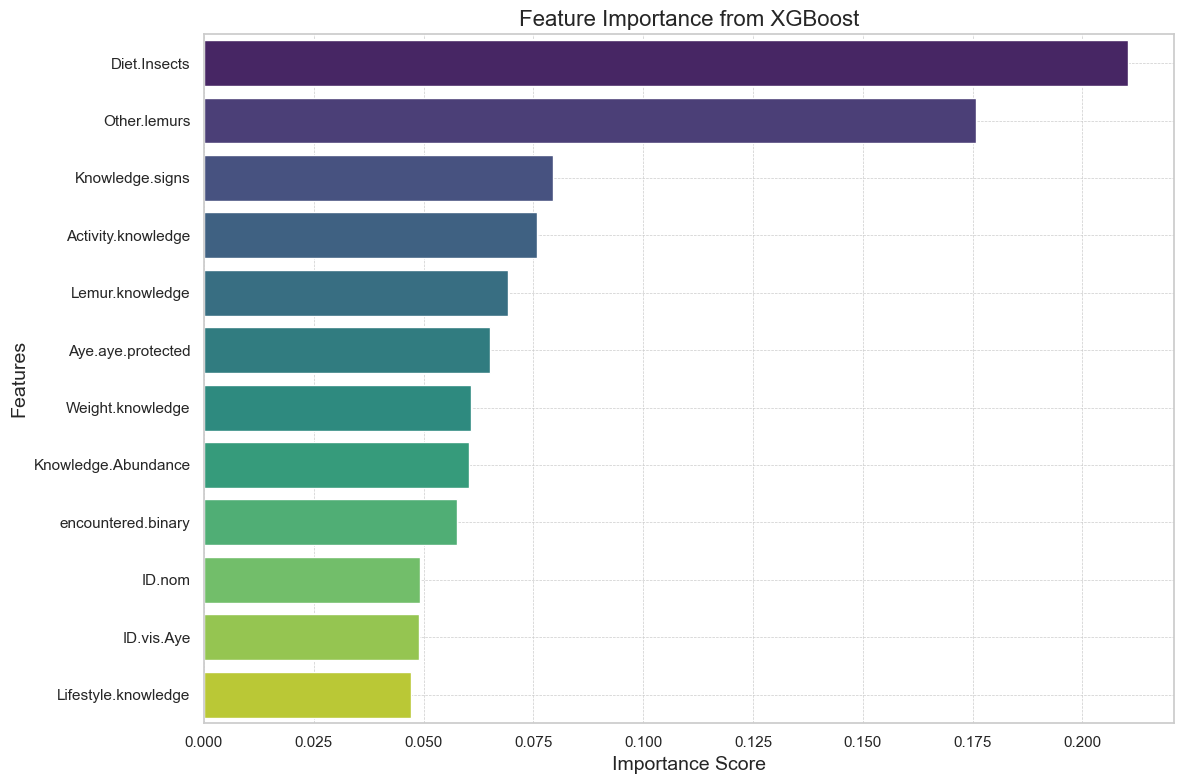

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=123)

# Training and Getting Feature Importance from XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=dataBK1.columns)
xgb_importance_sorted = xgb_importance.sort_values(ascending=False)
print(xgb_importance_sorted)


# PLOTTING
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=xgb_importance_sorted.values, y=xgb_importance_sorted.index, palette="viridis")
plt.title('Feature Importance from XGBoost', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

### Random Forest Feature Importance (Pipeline the Same as LR and XGBoost)

Diet.Insects           0.134581
Other.lemurs           0.099524
Activity.knowledge     0.091043
Lemur.knowledge        0.088551
Lifestyle.knowledge    0.087891
Knowledge.Abundance    0.085842
Aye.aye.protected      0.074955
Weight.knowledge       0.074030
ID.nom                 0.069995
Knowledge.signs        0.066882
ID.vis.Aye             0.065566
encountered.binary     0.061141
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



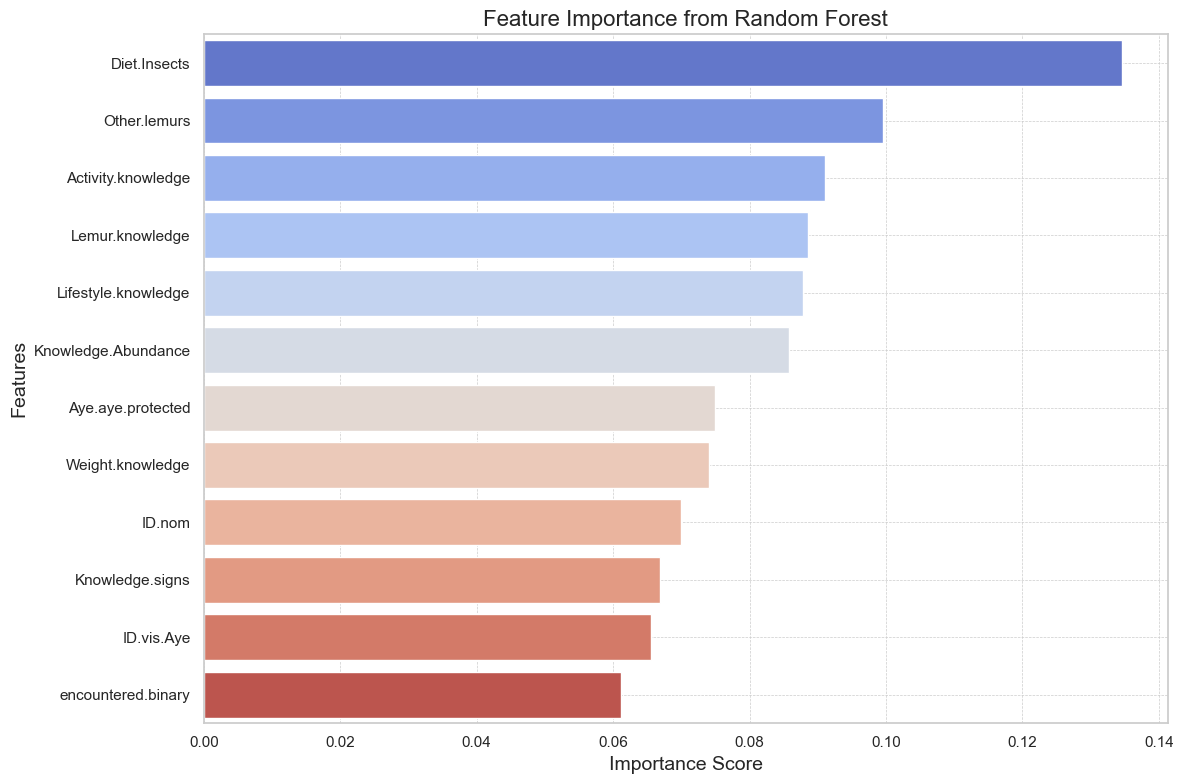

In [12]:
# Train & Get feature importance the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)
rf_importance = pd.Series(rf_model.feature_importances_, index=dataBK1.columns)
rf_importance_sorted = rf_importance.sort_values(ascending=False)
print(rf_importance_sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_importance_sorted.values, y=rf_importance_sorted.index, palette="coolwarm")
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Checking Permutation Importance
<br>
Explanation: Permutation Importance assesses the importance of features by measuring the decrease in model performance when the values of a feature are randomly shuffled. This method is model-agnostic and can be used with any model.
<br>
ref: https://scikit-learn.org/stable/modules/permutation_importance.html>

Diet.Insects           0.113924
Aye.aye.protected      0.073418
Lifestyle.knowledge    0.063291
Other.lemurs           0.032911
Lemur.knowledge        0.032911
ID.vis.Aye             0.025316
Activity.knowledge     0.015190
Knowledge.Abundance    0.007595
encountered.binary     0.000000
ID.nom                -0.002532
Weight.knowledge      -0.007595
Knowledge.signs       -0.010127
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



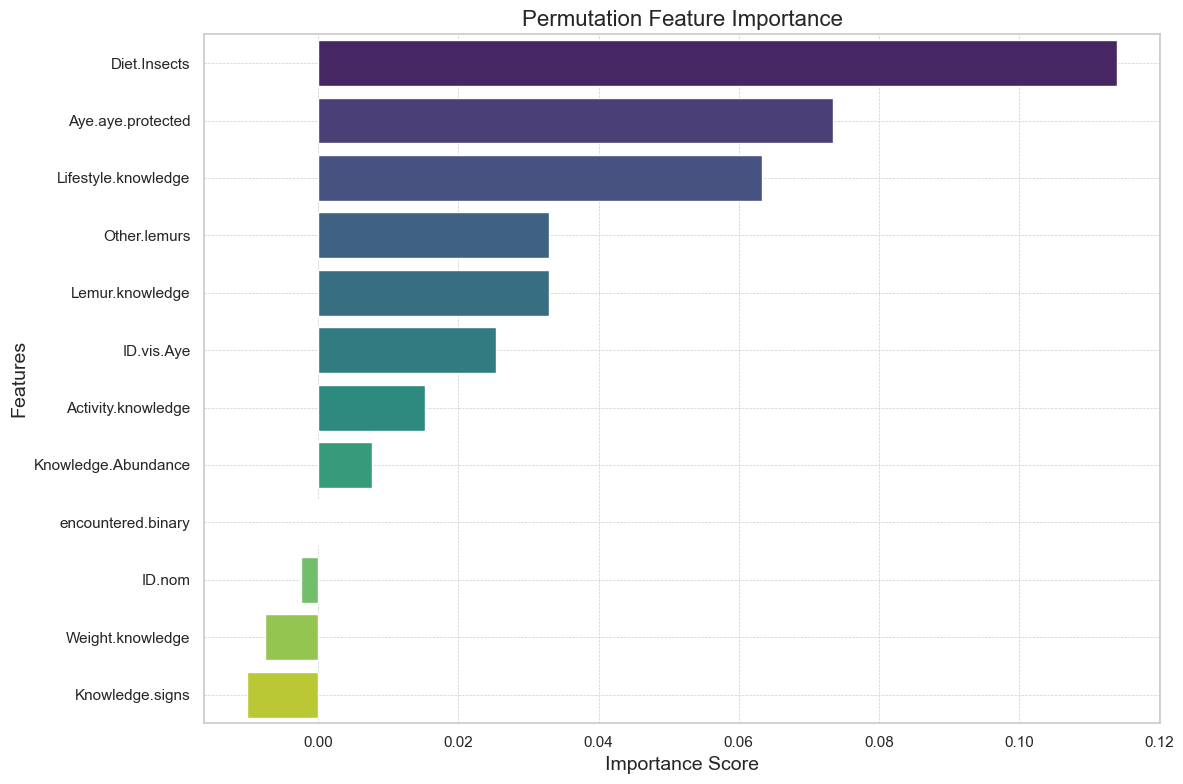

In [13]:
# Calculate permutation importance with RF model
results = permutation_importance(rf_model, X_test, y_test, scoring='accuracy')
perm_importance = pd.Series(results.importances_mean, index=dataBK1.columns)
perm_importance_sorted = perm_importance.sort_values(ascending=False)
print(perm_importance_sorted)
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=perm_importance_sorted.values, y=perm_importance_sorted.index, palette="viridis")
plt.title('Permutation Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Diet.Insects           0.078481
Lemur.knowledge        0.037975
Other.lemurs           0.037975
Lifestyle.knowledge    0.030380
Aye.aye.protected      0.020253
Knowledge.signs        0.017722
Activity.knowledge     0.010127
ID.vis.Aye            -0.005063
encountered.binary    -0.007595
Knowledge.Abundance   -0.010127
ID.nom                -0.025316
Weight.knowledge      -0.032911
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



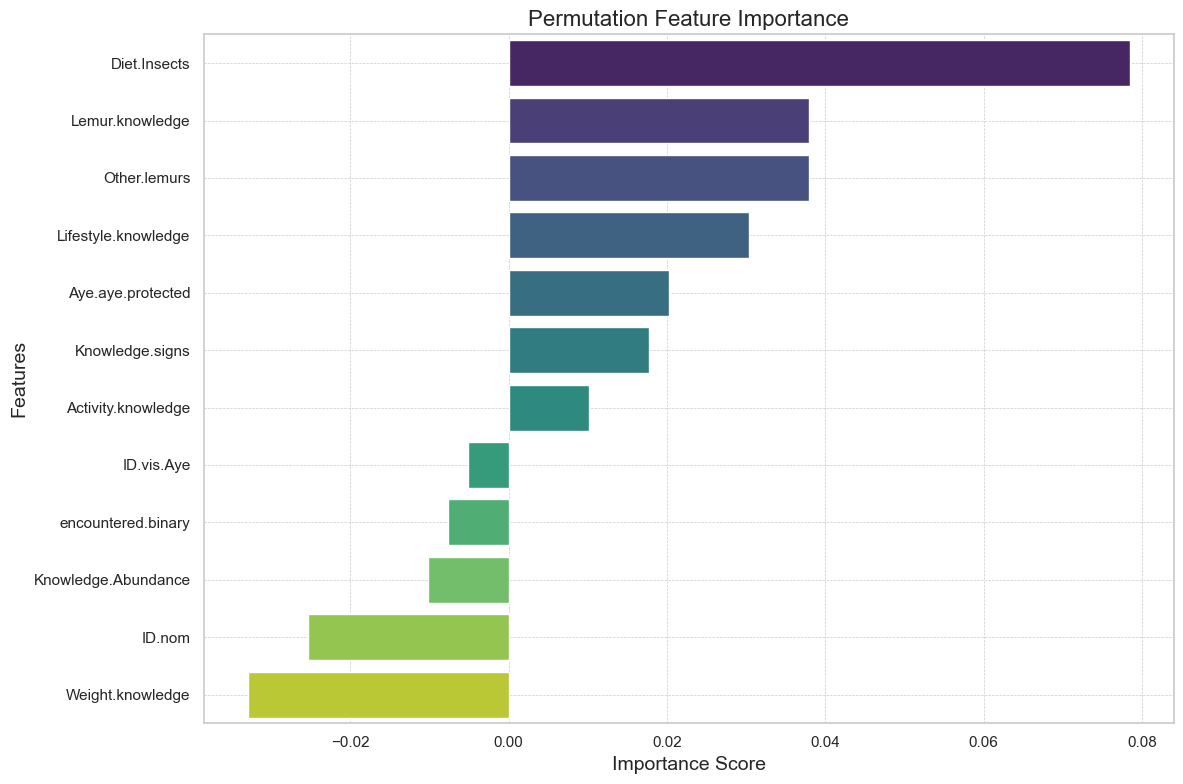

In [14]:
# Calculate permutation importance with XGboost Model
results = permutation_importance(xgb_model, X_test, y_test, scoring='accuracy')
perm_importance = pd.Series(results.importances_mean, index=dataBK1.columns)
perm_importance_sorted = perm_importance.sort_values(ascending=False)
print(perm_importance_sorted)
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=perm_importance_sorted.values, y=perm_importance_sorted.index, palette="viridis")
plt.title('Permutation Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### LR & XGBOOST & RF accuracy


In [11]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=123)
modelLr = LogisticRegression(max_iter=1000)
modelLr.fit(X_train, y_train)

# Evaluate the model
y_pred = modelLr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7088607594936709
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        47
           1       0.66      0.59      0.62        32

    accuracy                           0.71        79
   macro avg       0.70      0.69      0.69        79
weighted avg       0.71      0.71      0.71        79



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=123)

# Evaluate the model
y_pred = xgb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7372881355932204
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        70
           1       0.66      0.73      0.69        48

    accuracy                           0.74       118
   macro avg       0.73      0.74      0.73       118
weighted avg       0.74      0.74      0.74       118



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=123)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7711864406779662
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        70
           1       0.71      0.73      0.72        48

    accuracy                           0.77       118
   macro avg       0.76      0.76      0.76       118
weighted avg       0.77      0.77      0.77       118



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.6}
Accuracy: 66.95%
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        66
           1       0.65      0.54      0.59        52

    accuracy                           0.67       118
   macro avg       0.67      0.66      0.66       118
weighted avg       0.67      0.67      0.66       118



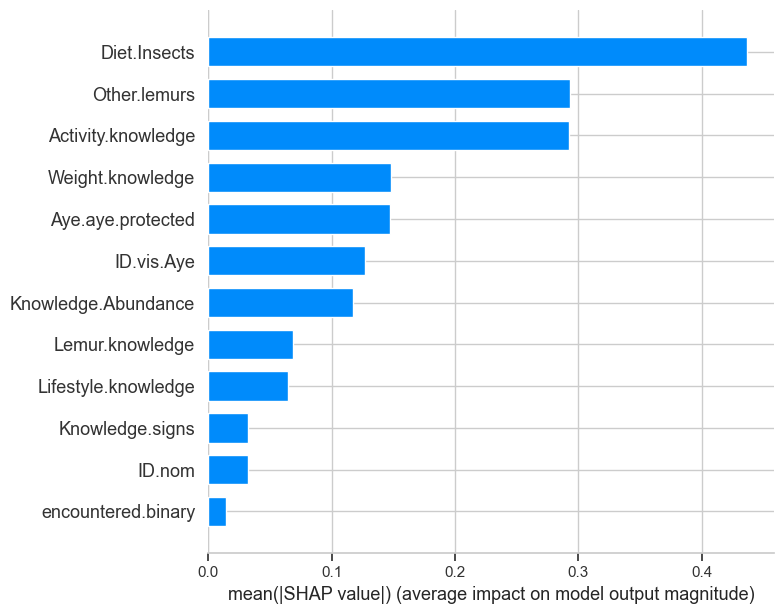

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42, stratify=target)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model: XGBoost with Grid Search for hyperparameter tuning
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Parameters for tuning
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [5, 7, 10],
    'n_estimators': [100, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Grid search to find the best parameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_

# Final model with best parameters
final_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train_scaled, y_train)

# Predictions and accuracy
y_pred = final_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# SHAP for feature importance
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test, plot_type="bar")

In [12]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import lightgbm as lgb


In [13]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(dataBK1, target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Model: CatBoost
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.01,
    depth=7,
    verbose=0
)

# Train the model
catboost_model.fit(X_train, y_train)

# Predictions
y_pred = catboost_model.predict(X_test)

# Accuracy and performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 63.64%
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        59
           1       0.68      0.64      0.66        73

    accuracy                           0.64       132
   macro avg       0.63      0.64      0.63       132
weighted avg       0.64      0.64      0.64       132



In [22]:
# Create the LightGBM model
lgb_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.01,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8
)

# Train the model
lgb_model.fit(X_train, y_train)

# Predictions
y_pred = lgb_model.predict(X_test)

# Accuracy and performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 146, number of negative: 160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 306, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477124 -> initscore=-0.091567
[LightGBM] [Info] Start training from score -0.091567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "c:\Users\yazda\anaconda3\envs\rectifyre\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\yazda\anaconda3\envs\rectifyre\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\yazda\anaconda3\envs\rectifyre\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\yazda\anaconda3\envs\rectifyre\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dropout, BatchNormalization
# Building the neural network
X_res, y_res = smote.fit_resample(dataBK1, target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the neural network
model = Sequential()

# Input layer and the first hidden layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Adding more hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model (no validation split, to avoid confusion)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Accuracy and performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Epoch 1/100
10/10 [==============================] - 3s 43ms/step - loss: 0.6695 - accuracy: 0.5621 - val_loss: 0.6197 - val_accuracy: 0.6667
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6006 - accuracy: 0.7222 - val_loss: 0.5897 - val_accuracy: 0.7121
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5564 - accuracy: 0.7386 - val_loss: 0.5811 - val_accuracy: 0.7197
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5327 - accuracy: 0.7484 - val_loss: 0.5938 - val_accuracy: 0.7045
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5189 - accuracy: 0.7582 - val_loss: 0.5967 - val_accuracy: 0.6970
Epoch 6/100
10/10 [==============================] - 0s 14ms/step - loss: 0.5034 - accuracy: 0.7614 - val_loss: 0.5966 - val_accuracy: 0.7045
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4919 - accuracy: 0.7712 - val_loss: 0.6088 - val_accuracy: 0.6818
Epoch 8

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC


In [31]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(dataBK1, target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network Model
def create_nn_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the neural network
nn_model = create_nn_model()
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Predict with neural network
nn_pred = (nn_model.predict(X_test_scaled) > 0.5).astype(int).flatten()

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

# Perform majority voting manually
final_pred = np.round((nn_pred + rf_pred + xgb_pred) / 3).astype(int)

# Accuracy and performance metrics
accuracy = accuracy_score(y_test, final_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, final_pred))

Epoch 1/100
10/10 [==============================] - 2s 33ms/step - loss: 0.8783 - accuracy: 0.5359 - val_loss: 0.6929 - val_accuracy: 0.4545
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.9597 - accuracy: 0.5686 - val_loss: 0.6779 - val_accuracy: 0.5455
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9148 - accuracy: 0.5654 - val_loss: 0.6674 - val_accuracy: 0.6742
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8056 - accuracy: 0.5915 - val_loss: 0.6599 - val_accuracy: 0.6439
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7583 - accuracy: 0.6111 - val_loss: 0.6547 - val_accuracy: 0.6364
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8069 - accuracy: 0.5948 - val_loss: 0.6498 - val_accuracy: 0.6288
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8872 - accuracy: 0.5817 - val_loss: 0.6464 - val_accuracy: 0.6364
Epoch 8/100


In [16]:
# One-hot encoding for categorical variables in the sociodemographic data
socio_data_encoded = pd.get_dummies(dataSD, columns=[
    'Region', 'Forest.cover2017', 'Forest.cover1990', 'Gender', 
    'Agegroup', 'edu.level', 'Ethnic.group'
], drop_first=True)

# Now merge the original dataset with the sociodemographic data based on 'Clove.benefit.score'
# We'll join on 'Clove.benefit.score' as the target, assuming the same instances appear in both datasets
merged_data = pd.merge(dataBK, socio_data_encoded, on='Clove.benefit.score', how='inner')

# Drop the original 'Clove.benefit.score' as it is our target column
X = merged_data.drop(columns=['Clove.benefit.score'])
y = merged_data['Clove.benefit.score']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Feature scaling for numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the new engineered dataset with features and the scaled values
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_scaled_df.head()

,ID.nom,ID.vis.Aye,Other.lemurs,Diet.Insects,Knowledge.signs,Knowledge.Abundance,Activity.knowledge,Weight.knowledge,Lifestyle.knowledge,Lemur.knowledge,...,Agegroup_21-30,Agegroup_31-40,Agegroup_41-50,Agegroup_51-60,Agegroup_61-70,Agegroup_>70,edu.level_Primary,edu.level_Secondary,Ethnic.group_2,Ethnic.group_3
0,0.603199,-0.487353,0.598607,-0.807281,-0.513671,-0.973267,-1.241201,-0.599319,-0.875744,-1.099681,...,-0.717972,1.913687,-0.369837,-0.378193,-0.183011,-0.15946,1.061950,-0.502977,-0.398988,-0.194066
1,-1.657828,-0.487353,-1.670544,-0.807281,-0.513671,-0.973267,-1.241201,1.668561,-0.875744,0.909355,...,1.392813,-0.522551,-0.369837,-0.378193,-0.183011,-0.15946,1.061950,-0.502977,-0.398988,-0.194066
2,0.603199,-0.487353,-1.670544,-0.807281,-0.513671,-0.973267,-1.241201,-0.599319,-0.875744,-1.099681,...,1.392813,-0.522551,-0.369837,-0.378193,-0.183011,-0.15946,1.061950,-0.502977,-0.398988,-0.194066
3,-1.657828,-0.487353,-1.670544,-0.807281,-0.513671,-0.973267,-1.241201,-0.599319,-0.875744,-1.099681,...,-0.717972,-0.522551,2.703896,-0.378193,-0.183011,-0.15946,-0.941664,1.988163,-0.398988,-0.194066
4,0.603199,-0.487353,-1.670544,-0.807281,-0.513671,1.027468,0.805671,-0.599319,1.141886,0.909355,...,-0.717972,-0.522551,2.703896,-0.378193,-0.183011,-0.15946,-0.941664,-0.502977,-0.398988,-0.194066


Epoch 1/5
525/525 [==============================] - 5s 6ms/step - loss: 0.4579 - accuracy: 0.7854
Epoch 2/5
525/525 [==============================] - 3s 6ms/step - loss: 0.2994 - accuracy: 0.8671
Epoch 3/5
525/525 [==============================] - 3s 6ms/step - loss: 0.2001 - accuracy: 0.9161
Epoch 4/5
525/525 [==============================] - 3s 6ms/step - loss: 0.1391 - accuracy: 0.9431
Epoch 5/5
900/900 [==============================] - 1s 2ms/step
Accuracy: 98.75%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14552
           1       0.99      0.98      0.99     14225

    accuracy                           0.99     28777
   macro avg       0.99      0.99      0.99     28777
weighted avg       0.99      0.99      0.99     28777

Top 7 important features from RandomForest:
1. Feature: Gender_1, Importance: 0.09031015801065248
2. Feature: Diet.Insects, Importance: 0.07049846817613538
3. Feature: Activity.knowledge, Importa

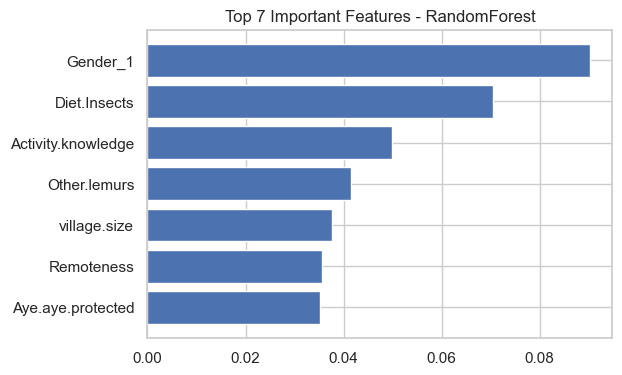

InvalidParameterError: The 'estimator' parameter of permutation_importance must be an object implementing 'fit'. Got <__main__.KerasWrapper object at 0x00000204F4B51C10> instead.

In [45]:
def create_nn_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the neural network
nn_model = create_nn_model()
nn_model.fit(X_train_scaled, y_train, epochs=5, batch_size=128, verbose=1)

# Make predictions using the neural network (convert probabilities to binary)
nn_pred_prob = nn_model.predict(X_test_scaled)
nn_pred = (nn_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Train RandomForest
rf_clf = RandomForestClassifier(n_estimators=50, random_state=123)
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)

# Perform soft voting between RandomForest and Neural Network
final_pred = np.round((nn_pred + rf_pred) / 2).astype(int)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, final_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, final_pred))

# Feature importance from RandomForest
rf_importances = rf_clf.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

# Show the top 7 important features from RandomForest
print("Top 7 important features from RandomForest:")
for i in range(7):
    print(f"{i + 1}. Feature: {X_train.columns[rf_indices[i]]}, Importance: {rf_importances[rf_indices[i]]}")

# Plot the top 7 feature importances from RandomForest
plt.figure(figsize=(6, 4))
plt.barh(X_train.columns[rf_indices[:7]], rf_importances[rf_indices[:7]], color="b", align="center")
plt.gca().invert_yaxis()
plt.title('Top 7 Important Features - RandomForest')
plt.show()

# Wrapper for Neural Network to work with permutation_importance
class KerasWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        prob = self.model.predict(X)
        return (prob > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Wrap the Keras model
nn_wrapper = KerasWrapper(nn_model)

# Use permutation importance on the neural network with the wrapper
perm_importance = permutation_importance(nn_wrapper, X_test_scaled, y_test, scoring='accuracy', n_repeats=10, random_state=42)

# Get the top 7 important features for the neural network
perm_indices = np.argsort(perm_importance.importances_mean)[::-1]

print("\nTop 7 important features from Neural Network (Permutation Importance):")
for i in range(7):
    print(f"{i + 1}. Feature: {X_train.columns[perm_indices[i]]}, Importance: {perm_importance.importances_mean[perm_indices[i]]}")

# Plot the top 7 features from Neural Network
plt.figure(figsize=(6, 4))
plt.barh(X_train.columns[perm_indices[:7]], perm_importance.importances_mean[perm_indices[:7]], color="g", align="center")
plt.gca().invert_yaxis()
plt.title('Top 7 Important Features - Neural Network (Permutation)')
plt.show()

900/900 [==============================] - 1s 2ms/step

Top 7 important features from Neural Network (Manual Permutation):
1. Feature: Gender_1, Importance: 0.13479514890363842
2. Feature: Farms.Paddy.Rice, Importance: 0.07714494214129342
3. Feature: Extracts.Medical.plants, Importance: 0.07631094276679296
4. Feature: edu.level_Primary, Importance: 0.06995169753622688
5. Feature: School, Importance: 0.0625152031135977
6. Feature: Farms.Tavy.Rice, Importance: 0.05476595892553082
7. Feature: Region_1, Importance: 0.05459220905584328


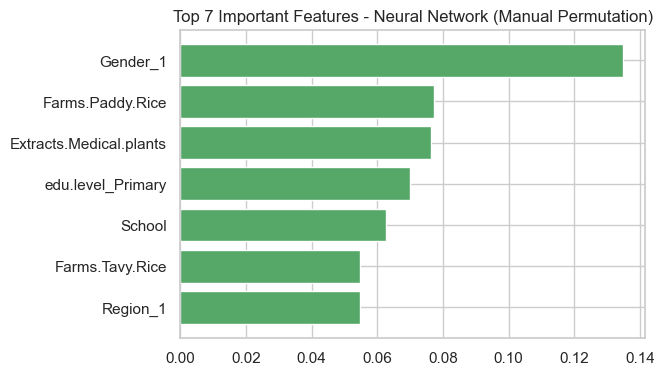

In [48]:
import numpy as np
from sklearn.metrics import accuracy_score
import copy

def permutation_importance_manual(model, X_test, y_test, n_repeats=5):
    # Get the baseline accuracy
    original_accuracy = accuracy_score(y_test, (model.predict(X_test) > 0.5).astype(int).flatten())

    feature_importances = np.zeros(X_test.shape[1])

    # Shuffle each feature 'n_repeats' times
    for col in range(X_test.shape[1]):
        accuracy_drops = []
        X_test_copy = np.array(X_test)  # Avoid deep copy

        # Shuffle the column 'n_repeats' times and recalculate accuracy
        for _ in range(n_repeats):
            np.random.shuffle(X_test_copy[:, col])
            shuffled_accuracy = accuracy_score(y_test, (model.predict(X_test_copy) > 0.5).astype(int).flatten())
            accuracy_drops.append(original_accuracy - shuffled_accuracy)

        # Average the accuracy drop for the current feature
        feature_importances[col] = np.mean(accuracy_drops)

    return feature_importances

# Reduce n_repeats to speed up the process
nn_importances = permutation_importance_manual(nn_model, X_test_scaled, y_test, n_repeats=1)

# Get the top 7 important features for the neural network
nn_indices = np.argsort(nn_importances)[::-1]

# Display the top 7 important features
print("\nTop 7 important features from Neural Network (Manual Permutation):")
for i in range(7):
    print(f"{i + 1}. Feature: {X_train.columns[nn_indices[i]]}, Importance: {nn_importances[nn_indices[i]]}")

# Plot the top 7 features from Neural Network
plt.figure(figsize=(6, 4))
plt.barh(X_train.columns[nn_indices[:7]], nn_importances[nn_indices[:7]], color="g", align="center")
plt.gca().invert_yaxis()
plt.title('Top 7 Important Features - Neural Network (Manual Permutation)')
plt.show()

In [20]:
def create_nn_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))  
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model()
# nn_model.fit(X_train_scaled, y_train, epochs=5, batch_size=128, verbose=1)

# nn_pred_prob = nn_model.predict(X_test_scaled)
# nn_pred = (nn_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary classes
# accuracy = accuracy_score(y_test, nn_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")
# print(classification_report(y_test, nn_pred))

900/900 [==============================] - 1s 1ms/step

Top 20 important features from Neural Network (Manual Permutation):
1. Feature: Region_2, Importance: 0.005886645585015815
2. Feature: Forest.cover1990_<30, Importance: 0.004725996455502657
3. Feature: Agegroup_51-60, Importance: 0.003996247002814757
4. Feature: Gender_1, Importance: 0.0034054974458769373
5. Feature: edu.level_Secondary, Importance: 0.003308197518851863
6. Feature: Weight.knowledge, Importance: 0.002925947805539142
7. Feature: Aye.aye.protected, Importance: 0.002870347847239119
8. Feature: ID.vis.Aye, Importance: 0.0019529485352886122
9. Feature: Extracts.Medical.plants, Importance: 0.0018903985822010694
10. Feature: Agegroup_41-50, Importance: 0.0011606491295131582
11. Feature: Remoteness, Importance: 0.001105049171213135
12. Feature: Agegroup_21-30, Importance: 0.0010355492233380947
13. Feature: Forest.cover1990_>70, Importance: 0.0009868992598255576
14. Feature: Ethnic.group_2, Importance: 0.0006949994787503911

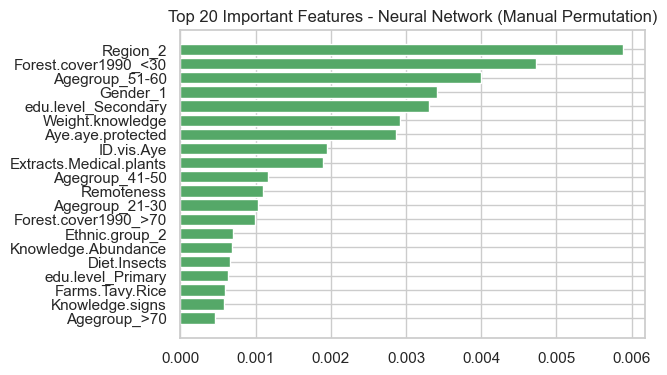

In [21]:
def permutation_importance_manual(model, X_test, y_test, n_repeats=5):
    original_accuracy = accuracy_score(y_test, (model.predict(X_test) > 0.5).astype(int).flatten())

    feature_importances = np.zeros(X_test.shape[1])
    for col in range(X_test.shape[1]):
        accuracy_drops = []
        X_test_copy = np.array(X_test) 
        for _ in range(n_repeats):
            np.random.shuffle(X_test_copy[:, col])
            shuffled_accuracy = accuracy_score(y_test, (model.predict(X_test_copy) > 0.5).astype(int).flatten())
            accuracy_drops.append(original_accuracy - shuffled_accuracy)

        feature_importances[col] = np.mean(accuracy_drops)

    return feature_importances

nn_importances = permutation_importance_manual(nn_model, X_test_scaled, y_test, n_repeats=5)
nn_indices = np.argsort(nn_importances)[::-1]
print("\nTop 20 important features from Neural Network (Manual Permutation):")
for i in range(20):
    print(f"{i + 1}. Feature: {X_train.columns[nn_indices[i]]}, Importance: {nn_importances[nn_indices[i]]}")
plt.figure(figsize=(6, 4))
plt.barh(X_train.columns[nn_indices[:20]], nn_importances[nn_indices[:20]], color="g", align="center")
plt.gca().invert_yaxis()
plt.title('Top 20 Important Features - Neural Network (Manual Permutation)')
plt.show()